In [1]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy




In [11]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [4]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [6]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [7]:
"""Splitting the dataset into the Training set and Test set"""

(x_train, x_test, y_train, y_test) = train_test_split(train_x, train_y,
        test_size=0.4, random_state=30)

In [8]:
""" Fitting KNN to the Training set with the best parameters obtained form gridsearch"""

knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(
    algorithm='auto',
    leaf_size=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    n_neighbors=9,
    p=2,
    weights='distance',
    ), order=[0, 1]))]).fit(x_train, y_train)

In [9]:
""" Predicting the Test set results """

y_pred = knn_model.predict(x_test)


In [12]:
"""  summarize performance """

print(f"Model r2_score :{round(r2_score(y_test, y_pred),3)}" )
print(f"Model MEE :{round(mean_euclidean_error(y_test, y_pred),3)}" )



Model r2_score :0.948
Model MEE :2.773


Text(0, 0.5, 'Residuals')

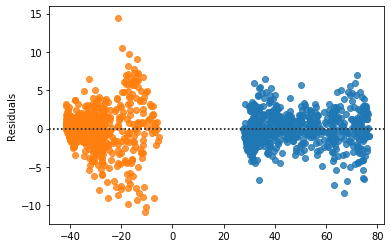

In [13]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_pred[:, 0], y_test[:, 0])
sns.residplot(y_pred[:, 1], y_test[:, 1]).set_ylabel('Residuals')

In [15]:
"""Feature Scaling """
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
x_cup_test = sc_X.transform(test_cup)

In [16]:
""" Predicting the cup test set results and dump to csv"""

y_cup = knn_model.predict(x_cup_test)
# pd.DataFrame(y_cup).to_csv("coffee_ML-CUP20-TS.csv",header=None)
